In [1]:
# Paso 0: Importar librerias necesarias

import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import pylab as plt

pd.options.display.max_rows = None

In [2]:
# Paso 1: Importar el DF de todas las empresas del IBEX 35

df = pd.read_csv('ibex35.csv')

df.head()

,id,ticker,empresa,date,open,high,low,close,adj close,volume
0,1,ANA,Acciona,2019-01-02,73.900002,73.900002,73.900002,73.900002,64.148270,0
1,1,ANA,Acciona,2022-06-24,174.199997,178.800003,174.000000,178.800003,169.562302,0
2,1,ANA,Acciona,2022-06-23,169.899994,173.199997,169.000000,173.000000,164.061951,0
3,1,ANA,Acciona,2022-06-22,171.399994,171.399994,168.800003,170.199997,161.406616,0
4,1,ANA,Acciona,2022-06-21,179.699997,179.699997,172.300003,173.600006,164.630966,0


In [3]:
acciona = df[df['empresa'] == 'Acciona']

acciona.shape

(1316, 10)

In [4]:
acciona = acciona [['date','open','high','low','close','adj close']]

acciona.shape

(1316, 6)

In [5]:
acciona['date'] = pd.to_datetime(acciona['date'], format="%Y-%m-%d")

In [6]:
acciona.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1316 entries, 0 to 1315
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       1316 non-null   datetime64[ns]
 1   open       1316 non-null   float64       
 2   high       1316 non-null   float64       
 3   low        1316 non-null   float64       
 4   close      1316 non-null   float64       
 5   adj close  1316 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 72.0 KB


In [7]:
acciona.sort_values(by='date',ascending= True, inplace=True)

In [8]:
acciona.shape

(1316, 6)

In [9]:
fecha_inicio = '2021-01-01'
fecha_fin = '2024-03-01'

acciona = acciona[(acciona['date'] >= fecha_inicio) & (acciona['date'] <= fecha_fin)]

In [10]:
acciona.shape

(811, 6)

In [11]:
date_range = pd.date_range(start=acciona['date'].min(), end=acciona['date'].max(), freq='D')

# Reindexa el dataframe con el nuevo rango de fechas
acciona = acciona.set_index('date').reindex(date_range).reset_index()

In [12]:
acciona

,index,open,high,low,close,adj close
0,2021-01-04,117.199997,118.099998,116.699997,116.699997,107.314598
1,2021-01-05,117.599998,117.900002,116.099998,116.599998,107.222633
2,2021-01-06,117.099998,119.400002,116.500000,119.400002,109.797455
3,2021-01-07,119.699997,126.199997,119.699997,125.900002,115.774712
4,2021-01-08,127.000000,128.600006,127.000000,127.800003,117.521904
5,2021-01-09,NaN,NaN,NaN,NaN,NaN
6,2021-01-10,NaN,NaN,NaN,NaN,NaN
7,2021-01-11,126.699997,126.699997,124.699997,124.699997,114.671211
8,2021-01-12,124.699997,127.000000,124.699997,124.800003,114.763176
9,2021-01-13,122.500000,126.599998,122.500000,126.599998,116.418411


In [13]:
acciona = acciona.fillna(method='ffill')

In [14]:
acciona

,index,open,high,low,close,adj close
0,2021-01-04,117.199997,118.099998,116.699997,116.699997,107.314598
1,2021-01-05,117.599998,117.900002,116.099998,116.599998,107.222633
2,2021-01-06,117.099998,119.400002,116.500000,119.400002,109.797455
3,2021-01-07,119.699997,126.199997,119.699997,125.900002,115.774712
4,2021-01-08,127.000000,128.600006,127.000000,127.800003,117.521904
5,2021-01-09,127.000000,128.600006,127.000000,127.800003,117.521904
6,2021-01-10,127.000000,128.600006,127.000000,127.800003,117.521904
7,2021-01-11,126.699997,126.699997,124.699997,124.699997,114.671211
8,2021-01-12,124.699997,127.000000,124.699997,124.800003,114.763176
9,2021-01-13,122.500000,126.599998,122.500000,126.599998,116.418411


In [15]:
acciona.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1153 entries, 0 to 1152
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   index      1153 non-null   datetime64[ns]
 1   open       1153 non-null   float64       
 2   high       1153 non-null   float64       
 3   low        1153 non-null   float64       
 4   close      1153 non-null   float64       
 5   adj close  1153 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 54.2 KB


In [16]:
acciona = acciona.rename(columns={'index': 'date'})

In [17]:
acciona = acciona.set_index('date')

acciona

,open,high,low,close,adj close
date,,,,,
2021-01-04,117.199997,118.099998,116.699997,116.699997,107.314598
2021-01-05,117.599998,117.900002,116.099998,116.599998,107.222633
2021-01-06,117.099998,119.400002,116.500000,119.400002,109.797455
2021-01-07,119.699997,126.199997,119.699997,125.900002,115.774712
2021-01-08,127.000000,128.600006,127.000000,127.800003,117.521904
2021-01-09,127.000000,128.600006,127.000000,127.800003,117.521904
2021-01-10,127.000000,128.600006,127.000000,127.800003,117.521904
2021-01-11,126.699997,126.699997,124.699997,124.699997,114.671211
2021-01-12,124.699997,127.000000,124.699997,124.800003,114.763176


In [18]:
acciona.index = pd.DatetimeIndex(acciona.index).to_period('d')

In [19]:
from pandas.plotting import lag_plot

<Axes: xlabel='y(t)', ylabel='y(t + 1)'>

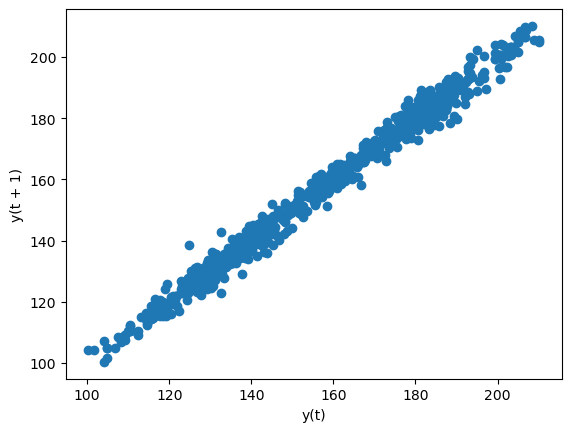

In [20]:
lag_plot(acciona.close)

In [21]:
# AR

from statsmodels.tsa.ar_model import AutoReg as AR

In [22]:
train, test = acciona.close[:-10], acciona.close[-10:]

train.shape, test.shape

((1143,), (10,))

In [23]:
modelo = AR(train, lags=1).fit()

In [24]:
len(train), len(acciona.close)-1  

(1143, 1152)

In [25]:
pred = modelo.predict(len(train), len(acciona.close)-1)

pred

2024-02-21    108.731984
2024-02-22    108.913225
2024-02-23    109.093729
2024-02-24    109.273499
2024-02-25    109.452538
2024-02-26    109.630848
2024-02-27    109.808434
2024-02-28    109.985297
2024-02-29    110.161442
2024-03-01    110.336870
Freq: D, dtype: float64

In [26]:
test

date
2024-02-21    108.300003
2024-02-22    106.699997
2024-02-23    104.750000
2024-02-24    104.750000
2024-02-25    104.750000
2024-02-26    101.550003
2024-02-27    104.199997
2024-02-28    100.300003
2024-02-29    104.050003
2024-03-01    107.000000
Freq: D, Name: close, dtype: float64

In [27]:
error = (pred - test).abs().sum()/len(pred)  

error

4.9037859824258705

In [28]:
res=pd.DataFrame({'real': test, 'pred': pred, 'error': pred - test})

res

,real,pred,error
2024-02-21,108.300003,108.731984,0.431981
2024-02-22,106.699997,108.913225,2.213228
2024-02-23,104.750000,109.093729,4.343729
2024-02-24,104.750000,109.273499,4.523499
2024-02-25,104.750000,109.452538,4.702538
2024-02-26,101.550003,109.630848,8.080845
2024-02-27,104.199997,109.808434,5.608437
2024-02-28,100.300003,109.985297,9.685294
2024-02-29,104.050003,110.161442,6.111439
2024-03-01,107.000000,110.336870,3.336870
